### Análisis exploratorio
Usando funciones definidas dentro de una clase


In [1]:
# Imported libraries
import os
import warnings
warnings.filterwarnings('ignore')
from utils import logger_class, read_dataset, eda_utils
import pandas as pd
import numpy as np


In [2]:
# Defining local file paths.
current_folder = globals()['_dh'][0]

# local_dir: Local directory where the data is stored.
# local_dir = os.path.abspath(__file__)
local_dir = os.path.abspath(current_folder)

# data_dir = os.path.abspath(os.path.join(__file__, "../", 'data/'))
data_dir = os.path.abspath(os.path.join(current_folder, 'data/'))
print('local_dir', local_dir)
print('data_dir', data_dir)

# l_extra is an additional parameter used to indicate the currently running file
l_extra = {'name_class': 'Main'}


local_dir /home/rodripc/datos_tumoresferas/py_folder
data_dir /home/rodripc/datos_tumoresferas/py_folder/data


In [3]:
# In this class, we define a logger that prints and saves a log file to help visualize the process
log_class = logger_class.getLogger(local_dir, data_dir)
logger = log_class.log_info()
logger.info('Running Main experiment file', extra=l_extra)

2023-07-01 00:23:43,431 - Main - Running Main experiment file


In [4]:
# This class loads the dataset provided and presents it in a dataframe format for familiar exploration and manipulation
build_class = read_dataset.DatasetRead(data_dir, logger)
X_train, y_train, X_test, y_test = build_class.build_dataset()
logger.info(f'lengths:{len(X_train), len(y_train), len(X_test), len(y_test)}', extra=l_extra)

X_train_df, y_train_df, X_test_df, y_test_df = build_class.dataframes_flatened(X_train, y_train, X_test, y_test)
logger.info(f'shapes:{X_train_df.shape, y_train_df.shape, X_test_df.shape, y_test_df.shape}', extra=l_extra)

2023-04-18 16:45:59,524 - load_class - Loading dataset...
2023-04-18 16:46:12,841 - Main - lengths:(90000, 90000, 10000, 10000)
2023-04-18 16:46:12,843 - load_class - Flattening the dataset and converting it into dataframes...
2023-04-18 16:46:24,300 - load_class - The dataset has been converted into dataframes.
2023-04-18 16:46:24,302 - Main - shapes:((90000, 56), (90000, 1), (10000, 55), (10000, 1))


### Preprocessing dataset

First, I will check if the dataset has been read correctly and evaluate whether the labels are balanced or not.

Take into account that the dataset has been converted into dataframe format for familiar exploration and manipulation.


In [5]:
# This class provides useful functions for exploring and manipulating the loaded dataframes
eda_class = eda_utils.DataManipulation(data_dir, X_train_df, y_train_df, X_test_df, y_test_df, logger)
#eda_class = eda_utils.DataManipulation(data_dir, X_train_df, X_test_df, logger)

In [6]:
# Let's check the shape of the resulting dataframes:
print(X_train_df.shape, y_train_df.shape, X_test_df.shape, y_test_df.shape)

(90000, 56) (90000, 1) (10000, 55) (10000, 1)


In [7]:
# Let's take a look at a sample of the resulting y_train_df dataframe:
y_train_df.sample(3)

,condition
4182,used
87872,new
33040,used


Let's explore if the labels are balanced or not:

In [8]:
col_ch = 'condition'
df_ch = y_train_df.copy()
eda_class.count_percentage_df(df_ch, column = col_ch)

,condition,count,percentage
0,new,48352,53.72%
1,used,41648,46.28%


In [9]:
# Let's check nulls in columns and count them
df_nulls = eda_class.df_nulls_func(y_train_df)
df_nulls

,count_nulls,percentage


In [10]:
col_ch = 'condition'
df_ch = y_test_df.copy()
eda_class.count_percentage_df(df_ch, column = col_ch)

,condition,count,percentage
0,new,5406,54.06%
1,used,4594,45.94%


The proportion of labels for "new" and "used" is balanced.

In [154]:
df_dt = eda_class.create_date_cols_df(dt_sample)
df_dt

,start_time,stop_time,date_created,last_updated,start_time_date_cat,stop_time_date_cat,date_created_date_cat,last_updated_date_cat,diff_stop_start_time_date_cat,diff_stop_last_updated_date_cat
75608,1443815213000,1448999213000,2015-10-02T19:46:53.000Z,2015-10-02T19:46:54.000Z,2015-10-02,2015-12-01,2015-10-02,2015-10-02,60,60
83,1440156174000,1445340174000,2015-08-21T11:22:54.000Z,2015-08-21T11:35:03.000Z,2015-08-21,2015-10-20,2015-08-21,2015-08-21,60,60
19261,1441715839000,1446899839000,2015-09-08T12:37:19.000Z,2015-09-08T12:37:21.000Z,2015-09-08,2015-11-07,2015-09-08,2015-09-08,60,60
3279,1444253536000,1449437536000,2015-10-07T21:32:16.000Z,2015-10-07T21:32:17.000Z,2015-10-07,2015-12-06,2015-10-07,2015-10-07,60,60
36986,1440858536000,1446042536000,2015-08-29T14:28:56.000Z,2015-08-29T14:28:57.000Z,2015-08-29,2015-10-28,2015-08-29,2015-08-29,60,60
...,...,...,...,...,...,...,...,...,...,...
79506,1442594360000,1447778360000,2015-09-18T16:39:21.000Z,2015-09-18T16:39:22.000Z,2015-09-18,2015-11-17,2015-09-18,2015-09-18,60,60
47537,1440480287000,1445664287000,2015-08-25T05:24:47.000Z,2015-08-25T05:24:48.000Z,2015-08-25,2015-10-24,2015-08-25,2015-08-25,60,60
19099,1441294981000,1446478981000,2015-09-03T15:43:02.000Z,2015-09-03T15:44:51.000Z,2015-09-03,2015-11-02,2015-09-03,2015-09-03,60,60
31388,1443120504000,1448304504000,2015-09-24T18:48:24.000Z,2015-09-24T18:48:25.000Z,2015-09-24,2015-11-23,2015-09-24,2015-09-24,60,60


In [155]:
diff_stop_start_time_sample = df_dt['diff_stop_start_time_date_cat'].sample(1000).copy()
np.round(pd.DataFrame(diff_stop_start_time_sample.describe(percentiles=[.25, .50, .75, .90, .95])).T,4)

,count,mean,std,min,25%,50%,75%,90%,95%,max
diff_stop_start_time_date_cat,1000.0,60.358,10.6744,5.0,60.0,60.0,60.0,60.0,60.0,299.0


In [158]:
The majority of announcements, even when the sample is altered, have a duration of 60 days, which is equivalent to 2 months. 
Sadly,  it appears that the columns labeled as 'date_created_date_cat' and 'last_updated_date_cat' are not providing any meaningful information and they wont be calculated for the datasets or given to the model and the data columns will be dropped

SyntaxError: invalid syntax (2220111482.py, line 1)

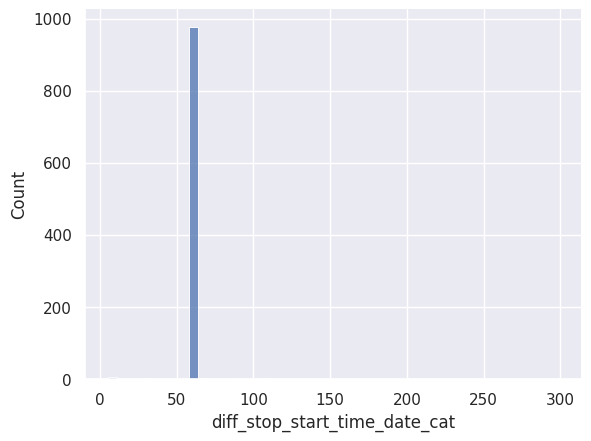

In [157]:
sns.histplot(diff_stop_start_time_sample, bins = 50)
sns.despine()

In [156]:
col_ch = 'diff_stop_start_time_sample'
train_df = pd.DataFrame(diff_stop_start_time_sample.copy())
train_df.columns = [col_ch]
test_df = pd.DataFrame(diff_stop_start_time_sample.copy())
test_df.columns = [col_ch]

In [147]:
logger.info('Creating categorical columns based on the \'sold_quantity\' column. ', extra=l_extra)
train_df, test_df = eda_class.create_qcuts_num_column(train_df, test_df, 'diff_stop_start_time_sample')
train_df.head()

2023-04-18 17:29:21,819 - Main - Creating categorical columns based on the 'sold_quantity' column. 


,diff_stop_start_time_sample,diff_stop_start_time_sample_cat
40359,60,0
29457,60,0
49043,60,0
76297,60,0
43070,60,0


In [148]:
train_df, test_df = eda_class.create_category_columns_qcut_cat(train_df, test_df, col_ch = 'diff_stop_start_time_sample_cat', qcut = 10)

2023-04-18 17:29:42,461 - eda_class - len and list of columns created: len = 2,  list: ['is_diff_stop_start_time_sample_cat_0', 'is_diff_stop_start_time_sample_cat_1'] 
2023-04-18 17:29:42,478 - eda_class - len and list of columns created: len = 2,  list: ['is_diff_stop_start_time_sample_cat_0', 'is_diff_stop_start_time_sample_cat_1'] 


info Index([0, 1], dtype='int64')


In [151]:
train_df['diff_stop_start_time_sample_cat'].value_counts()

diff_stop_start_time_sample_cat
0    986
1     14
Name: count, dtype: int64